# Part 2

### Unzip

In [ ]:
!apt-get -qq install unrar

In [3]:
!unrar x CA4_Datasets.rar


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from CA4_Datasets.rar

Extracting  Question_1.csv                                                97%  OK 
Extracting  Question_2.csv                                               100%  OK 
All OK


### Libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC

### Load data

In [6]:
# load data
data = pd.read_csv('Question_2.csv')

### Create time sequenced data

In [7]:
# function to prepare the time sequenced samples
def create_time_sequenced_data(data, window_size=10):
    features = []
    labels = []

    for i in range(len(data) - window_size):

        features.append(data['Temp'][i:i+window_size].tolist())     # create feature
        labels.append(data['Temp'][i + window_size])                # create target

    return features, labels

In [8]:
# prepare the features and labels
features, labels = create_time_sequenced_data(data)

# convert to dataframe
features_df = pd.DataFrame(features, columns=[f"Day {i+1}" for i in range(10)])
labels_df = pd.DataFrame(labels, columns=["Label (Day 11 Temp)"])

In [9]:
features_df.shape

(3640, 10)

In [10]:
labels_df.shape

(3640, 1)

### Splitting data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(features_df, labels, test_size=0.20, random_state=42)

### Create and fit regression model

In [17]:
# define the model
model = LinearRegression()

# train the model
model.fit(X_train, y_train)

LinearRegression()

In [23]:
#‌ print w and b of wx + b
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 0.04730306  0.03824898  0.0468321   0.04071717  0.06068967  0.05703717
  0.03463836  0.08232561 -0.0966962   0.60654376]
Intercept: 0.9275698762994473


### Prediction and evaluation

In [21]:
# predict on the testing set
y_pred = model.predict(X_test)

# calculate the rmse and mae value
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

In [24]:
# print rmse and mae
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

Root Mean Squared Error: 2.4113535227841543
Mean Absolute Error: 1.9076905202696846


### Plotting for investigation of model performance

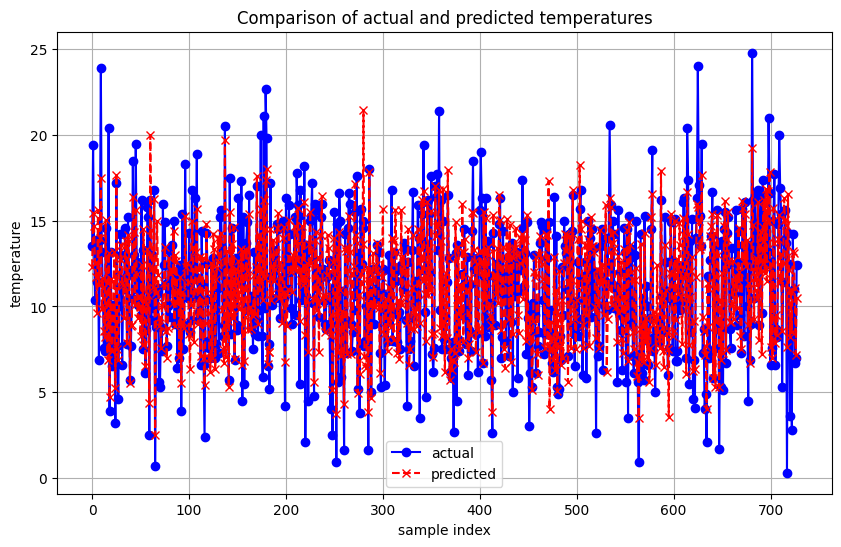

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='actual', color='blue', marker='o')  # Actual values
plt.plot(y_pred, label='predicted', color='red', linestyle='--', marker='x')  # Predicted values
plt.title('Comparison of actual and predicted temperatures')
plt.xlabel('sample index')
plt.ylabel('temperature')
plt.legend()
plt.grid(True)
plt.show()

### New label

In [28]:
# extract last data of each 10 sequence
last_day_temps = features_df['Day 10']

# calculate the new labels
new_labels = (labels_df['Label (Day 11 Temp)'] > last_day_temps).astype(int)

# replace new label
labels_df['New Label'] = new_labels

In [31]:
labels_df.head(5)

,Label (Day 11 Temp),New Label
0,16.2,0
1,13.3,0
2,16.7,1
3,21.5,1
4,25.0,1


### SVM

In [39]:
X = features_df.values
y = labels_df['New Label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# svm model with a linear kernel
svm_model = SVC(kernel='linear')

# fit the model
svm_model.fit(X_train, y_train)

# predict the training set
y_train_pred = svm_model.predict(X_train)

In [40]:
# predict on the test set
y_test_pred = svm_model.predict(X_test)

# evaluation metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

In [41]:
# print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6428571428571429
Precision: 0.6675062972292192
Recall: 0.6743002544529262
F1 Score: 0.6708860759493671


### Bounce

In [43]:
last_day_temps_test = X_test[:, -1]

In [45]:
# threshold for specify chaanges in regression prediction
threshold = 0
lr_binarized_preds = (y_pred - last_day_temps_test > threshold).astype(int)

# compare
comparison = lr_binarized_preds == y_test_pred

# calculate correspondence rate
correspondence_rate = np.mean(comparison)

In [46]:
correspondence_rate

0.9409340659340659